In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('Playoffs.csv')

# Calculate 2-point and 3-point stats per game by season
shooting_stats = df.groupby('year').agg({
    'GP': 'sum',
    'FGM': 'sum',
    'FGA': 'sum',
    'FG3M': 'sum',
    'FG3A': 'sum'
}).reset_index()

# Calculate 2-point field goals
# subtracting 3-pointers from total field goals
shooting_stats['FG2M'] = shooting_stats['FGM'] - shooting_stats['FG3M']
shooting_stats['FG2A'] = shooting_stats['FGA'] - shooting_stats['FG3A']

# Calculate per game averages
shooting_stats['FG2M_per_game'] = shooting_stats['FG2M'] / shooting_stats['GP']
shooting_stats['FG2A_per_game'] = shooting_stats['FG2A'] / shooting_stats['GP']
shooting_stats['FG3M_per_game'] = shooting_stats['FG3M'] / shooting_stats['GP']
shooting_stats['FG3A_per_game'] = shooting_stats['FG3A'] / shooting_stats['GP']

In [40]:
shooting_stats

,year,GP,FGM,FGA,FG3M,FG3A,FG2M,FG2A,FG2M_per_game,FG2A_per_game,FG3M_per_game,FG3A_per_game
0,2012-13,1781,5953,13496,1205,3502,4748,9994,2.665918,5.611454,0.676586,1.966311
1,2013-14,1905,6472,14239,1426,3978,5046,10261,2.648819,5.386352,0.748556,2.088189
2,2014-15,1653,5964,13695,1424,4139,4540,9556,2.746521,5.781004,0.861464,2.503932
3,2015-16,1900,6286,14295,1571,4432,4715,9863,2.481579,5.191053,0.826842,2.332632
4,2016-17,1737,6086,13219,1660,4597,4426,8622,2.548071,4.963731,0.955671,2.646517
5,2017-18,1729,6294,13816,1723,4906,4571,8910,2.643725,5.153268,0.996530,2.837478
6,2018-19,1761,6312,14259,1862,5401,4450,8858,2.526973,5.030097,1.057354,3.067007
7,2019-20,1694,6447,14107,2170,6027,4277,8080,2.524793,4.769776,1.280992,3.557851
8,2020-21,1864,6829,14771,2122,5831,4707,8940,2.525215,4.796137,1.138412,3.128219
9,2021-22,1892,6639,14571,2135,6017,4504,8554,2.380550,4.521142,1.128436,3.180233


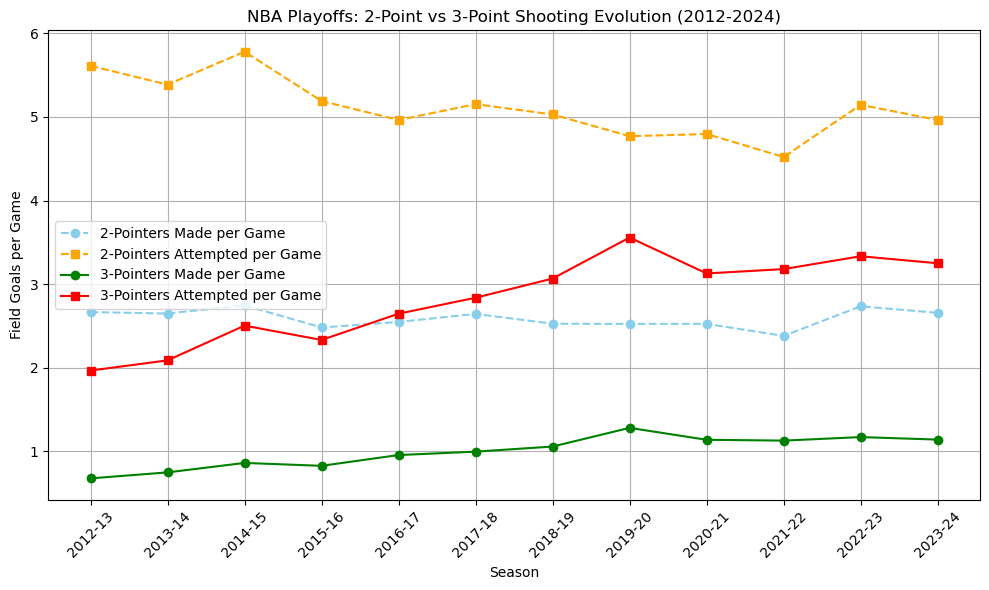

In [41]:
# Create the visualization
# Plot 2-point shots with dashed lines
plt.figure(figsize = (10, 6))
plt.plot(shooting_stats['year'], shooting_stats['FG2M_per_game'], color = 'skyblue',
         marker = 'o', linestyle = '--', label = '2-Pointers Made per Game')
plt.plot(shooting_stats['year'], shooting_stats['FG2A_per_game'], color = 'orange',
         marker = 's', linestyle = '--', label = '2-Pointers Attempted per Game')

# Plot 3-point shots with solid lines
plt.plot(shooting_stats['year'], shooting_stats['FG3M_per_game'], color = 'green',
         marker = 'o', label = '3-Pointers Made per Game')
plt.plot(shooting_stats['year'], shooting_stats['FG3A_per_game'], color = 'red',
         marker = 's', label = '3-Pointers Attempted per Game')

# Format the visualization
plt.title('NBA Playoffs: 2-Point vs 3-Point Shooting Evolution (2012-2024)')
plt.xlabel('Season')
plt.ylabel('Field Goals per Game')
plt.grid(True)
plt.legend()
plt.xticks(rotation = 45)

# Show the plot
plt.tight_layout()
plt.show()

In [42]:
# Calculate and print trend analysis
fg2_2012 = round(shooting_stats.iloc[0]['FG2M_per_game'], 2)
fg2_2023 = round(shooting_stats.iloc[-1]['FG2M_per_game'], 2)
fg2_pct_change = round(((fg2_2023 - fg2_2012) / fg2_2012) * 100)

fg3_2012 = round(shooting_stats.iloc[0]['FG3M_per_game'], 2)
fg3_2023 = round(shooting_stats.iloc[-1]['FG3M_per_game'], 2)
fg3_pct_change = round(((fg3_2023 - fg3_2012) / fg3_2012) * 100)

print("\nChanges in Shooting Patterns (2012-13 to 2023-24):")
print(f"2PT Made per game: {fg2_pct_change}% change ({fg2_2012} to {fg2_2023})")
print(f"3PT Made per game: {fg3_pct_change}% change ({fg3_2012} to {fg3_2023})")


Changes in Shooting Patterns (2012-13 to 2023-24):
2PT Made per game: 0% change (2.67 to 2.66)
3PT Made per game: 68% change (0.68 to 1.14)


### Explanation
Some key observation our team found is the three point attempts and makes shows an increasing trend from 2012-2024 with 3 point made per game increasing by 68% over the past 12 years from 0.68 to 1.14. This finding shows that the team has shifted scoring strategies and is focusing more on making 3's. This is an evolutionary change because effectively making 3's can help the team score more points compared to the team still focusing on 2 point strategies. Conversely, 2-point attempts show a downward trend over this period due to 3-point strategies. Overall, this visualization reflects the NBA's 3-point revolution even in the playoff season, where players usually choose to shoot more 2 points (safer way to score). Players and teams are now using strategies that prioritize 3-point shots while maintaining consistent efficiency in 2-point shooting (2-point made per game has not significantly changed in the past 12 seasons).

### Possible Adjustment For Future
For a better visualization of the transformation of the scoring technique to 3-point, we can compiled play off data before 2012-13 season and update the most recent data.